## **Assignment 1A**

# Import Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn is another good plotting library. In particular, I like it for heatmaps (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools


## Q1
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Q2
from gensim.models import Word2Vec
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC, NuSVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy.stats import norm
from sklearn import tree

# To export as pdf with better quality plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


Mounted at /content/drive




---



# Q1: Regression
- Train a linear regression model to predict the number of violent crimes per   captia from the socio-economic data.
- Train a Ridge regression model to predict the number of violent crimes per captia from the socio-economic data.
- Train a LASSO regression model to predict the number of violent crimes per captia from the socio-economic data.

do not performing any filtering or selection to remove columns and/or rows

In [ ]:
# Load the data
##info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Communities_Info.txt')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q1/communities_test.csv')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q1/communities_train.csv')
val = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q1/communities_val.csv')

NameError: ignored

In [ ]:
# Plot data
# fig = plt.figure(figsize=[10, 6])
# ax = fig.add_subplot()
# ax.plot(test[' ViolentCrimesPerPop '])
# ax.set_title('Test Data')

# fig = plt.figure(figsize=[10, 6])
# ax = fig.add_subplot()
# ax.plot(train[' ViolentCrimesPerPop '])
# ax.set_title('Train Data')

# fig = plt.figure(figsize=[10, 6])
# ax = fig.add_subplot()
# ax.plot(val[' ViolentCrimesPerPop '])
# ax.set_title('Validate Data')



---



## Linear Regression

In [ ]:
## Add Constants ##
train = sm.add_constant(train)
val = sm.add_constant(val)
test = sm.add_constant(test)

## Data Splitting ##
X_train = train
Y_train = train.iloc[:,-1]
X_val = val
Y_val = val.iloc[:,-1]
X_test = test
Y_test = test.iloc[:,-1]

In [ ]:
## LINEAR MODEL ##
model = sm.OLS(Y_test, X_test)
trained_model = model.fit()
print(trained_model.summary())

In [ ]:
## Looking at residuals
f = sm.qqplot(trained_model.resid)
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.hist(trained_model.resid, 50)
ax.set_title("Trained Model Hist")

Y_train_pred = trained_model.predict(X_train)
Y_test_pred = trained_model.predict(X_test)
rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train)**2))
rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test)**2))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train, label='Actual')
ax.set_title("Train: "+ str(rmse_train))
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test, label='Actual')
ax.set_title("Test: "+ str(rmse_test))
ax.legend();



---



## SKLearn's Regression Function

In [ ]:
## SKLearn's Regression Funct
model_sk_linear = LinearRegression(fit_intercept = False).fit(X = X_test.to_numpy(), y = Y_test.to_numpy())
print(model_sk_linear.coef_)
print(model_sk_linear.score(X_test.to_numpy(), Y_test.to_numpy()))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(model_sk_linear.predict(X_val.values), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(model_sk_linear.predict(X_test.values), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

f = sm.qqplot(trained_model.resid)
fig = plt.figure(figsize=[20, 16])

residuals = model_sk_linear.predict(X_train) - Y_train
ax = fig.add_subplot(3, 2, 1)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Linear")
ax = fig.add_subplot(3, 2, 2)
ax.hist(residuals, 50)
ax.set_title("Linear")

print('Linear R**2 = ' + str(model_sk_linear.score(X_train, Y_train)))

## Ridge Regression

In [ ]:
## RIDGE REGRESSION ##

model_sk_ridge = Ridge(fit_intercept = False).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())

print(model_sk_ridge.coef_)
print(model_sk_ridge.score(X_train.to_numpy(), Y_train.to_numpy()))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(model_sk_ridge.predict(X_val.values), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(model_sk_ridge.predict(X_test.values), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')


lambdas = np.arange(0, 500, 2)
rmse_train = []
rmse_validation = []
for l in lambdas:
    model_sk_ridge = Ridge(fit_intercept=False, alpha=l).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
    rmse_train.append(np.sqrt(np.mean((model_sk_ridge.predict(X_train.to_numpy()) - Y_train.to_numpy())**2)))
    rmse_validation.append(np.sqrt(np.mean((model_sk_ridge.predict(X_val.to_numpy()) - Y_val.to_numpy())**2)))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 2, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();



---



## Standardisation

In [ ]:
## Poly test
poly_transform = PolynomialFeatures(4)

X_test_poly = poly_transform.fit_transform(X_test.iloc[:,1:-1])

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_test_poly[:,1:100]);

In [ ]:
## Standardisation test

mu = np.mean(X_test.iloc[:, 1:-1])
sigma = np.std(X_test.iloc[:, 1:-1])
X_test_poly = (X_test.iloc[:, 1:-1] - mu) / sigma

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_test_poly);

In [ ]:
poly_transform = PolynomialFeatures(4)

X_train_poly = poly_transform.fit_transform(X_train.iloc[:,1:-1])

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_train_poly[:,1:100]);

In [ ]:
## Standardisation train

mu = np.mean(X_train.iloc[:, 1:-1])
sigma = np.std(X_train.iloc[:, 1:-1])
X_train_poly = (X_train.iloc[:, 1:-1] - mu) / sigma

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_train_poly);

In [ ]:
poly_transform = PolynomialFeatures(4)

X_val_poly = poly_transform.fit_transform(X_val.iloc[:,1:-1])

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_val_poly[:,1:100]);

In [ ]:
## Standardisation val

mu = np.mean(X_val.iloc[:, 1:-1])
sigma = np.std(X_val.iloc[:, 1:-1])
X_val_poly = (X_val.iloc[:, 1:-1] - mu) / sigma

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot(1, 1, 1)
# ax.boxplot(X_val_poly);

In [ ]:
## Standardise Y values
## Training Samples ##
num_samples = test.shape[0]
training_samples = train.shape[0]
#int(num_samples*0.7)
validation_samples = val.shape[0]
#int(num_samples*0.15)

## Test
Y_mu_test = np.mean(Y_test)
Y_sigma_test = np.std(Y_test)
Y_test_poly = (Y_test - Y_mu_test) / Y_sigma_test

## Train
Y_mu = np.mean(Y_train)
Y_sigma = np.std(Y_train)
Y_train_poly = (Y_train - Y_mu) / Y_sigma

## Val
Y_mu = np.mean(Y_val)
Y_sigma = np.std(Y_val)
Y_val_poly = (Y_val - Y_mu) / Y_sigma



---



## Glenn Ridge With Standardised Data

In [ ]:
lambdas = np.arange(0, 75, 0.5)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    trained_model_poly_ridge = Ridge(fit_intercept=False, alpha=l).fit(X_train_poly, Y_train_poly)
    coeffs.append(trained_model_poly_ridge.coef_)
    rmse_train.append(np.sqrt(np.mean((trained_model_poly_ridge.predict(X_train_poly) - Y_train_poly)**2)))
    rmse_validation.append(np.sqrt(np.mean((trained_model_poly_ridge.predict(X_val_poly) - Y_val_poly)**2)))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();
ax = fig.add_subplot(2, 1, 2)
ax.plot(lambdas[1:], rmse_train[1:], label='Training RMSE')
ax.plot(lambdas[1:], rmse_validation[1:], label='Validation RMSE')
ax.legend();

In [ ]:
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(lambdas, coeffs);
coeffs = np.array(coeffs)
ax = fig.add_subplot(2, 1, 2)
ax.plot(lambdas[1:400], coeffs[1:400,:]);

In [ ]:
## Best fit model
best_lambda = lambdas[np.argmin(rmse_validation)]
print(best_lambda)
trained_model_poly_ridge = Ridge(fit_intercept=False, alpha=best_lambda).fit(X_train_poly, Y_train_poly)

Y_train_poly_pred = trained_model_poly_ridge.predict(X_train_poly)
Y_test_poly_pred = trained_model_poly_ridge.predict(X_test_poly)
rmse_train = np.sqrt(np.mean((Y_train_poly_pred - Y_train_poly)**2))
rmse_test = np.sqrt(np.mean(((Y_test_poly_pred*Y_sigma_test + Y_mu_test) - (Y_test_poly*Y_sigma_test + Y_mu_test))**2))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_poly_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train_poly, label='Actual')
ax.set_title("Train: "+ str(rmse_train))
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_poly_pred*Y_sigma_test + Y_mu_test, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test_poly*Y_sigma_test + Y_mu_test, label='Actual')
ax.set_title("Test: "+ str(rmse_test))
ax.legend();



---



## LASSO Regression

In [ ]:
## LASSO REGRESSION ##

lambdas = np.arange(0.0, 0.8, 0.01)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    trained_model_poly_lasso = Lasso(fit_intercept=False, alpha=l).fit(X_train_poly, Y_train_poly)
    coeffs.append(trained_model_poly_lasso.coef_)
    rmse_train.append(np.sqrt(np.mean((trained_model_poly_lasso.predict(X_train_poly) - Y_train_poly)**2)))
    rmse_validation.append(np.sqrt(np.mean((trained_model_poly_lasso.predict(X_val_poly) - Y_val_poly)**2)))

fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();

In [ ]:
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, coeffs);

In [ ]:
best_lambda = lambdas[np.argmin(rmse_validation)]
print(best_lambda)

In [ ]:
trained_model_poly_lasso = Lasso(fit_intercept=False, alpha=best_lambda).fit(X_train_poly, Y_train_poly)

Y_train_poly_pred = trained_model_poly_lasso.predict(X_train_poly)
Y_test_poly_pred = trained_model_poly_lasso.predict(X_test_poly)
rmse_train = np.sqrt(np.mean((Y_train_poly_pred - Y_train_poly)**2))
rmse_test = np.sqrt(np.mean(((Y_test_poly_pred*Y_sigma_test + Y_mu_test) - (Y_test_poly*Y_sigma_test + Y_mu_test))**2))

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_poly_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train_poly, label='Actual')
ax.set_title("Train: "+ str(rmse_train))
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_poly_pred*Y_sigma_test + Y_mu_test, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test_poly*Y_sigma_test + Y_mu_test, label='Actual')
ax.set_title("Test: "+ str(rmse_test))
ax.legend();

In [ ]:
sum(trained_model_poly_lasso.coef_ != 0)

## Compare Models

In [ ]:
f = sm.qqplot(trained_model.resid)
fig = plt.figure(figsize=[20, 16])


residuals = model_sk_ridge.predict(X_train) - Y_train
ax = fig.add_subplot(3, 2, 1)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Ridge")
ax = fig.add_subplot(3, 2, 2)
ax.hist(residuals, 50)
ax.set_title("Ridge")

residuals = trained_model_poly_ridge.predict(X_train_poly) - Y_train_poly
ax = fig.add_subplot(3, 2, 3)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Ridge - standardised")
ax = fig.add_subplot(3, 2, 4)
ax.hist(residuals, 50)
ax.set_title("Ridge - standardised")

residuals = trained_model_poly_lasso.predict(X_train_poly) - Y_train_poly
ax = fig.add_subplot(3, 2, 5)
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Lasso")
ax = fig.add_subplot(3, 2, 6)
ax.hist(residuals, 50)
ax.set_title("Lasso")
print('Ridge R**2 = ' + str(trained_model_poly_lasso.score(X_train_poly, Y_train_poly)))
print('Lasso R**2 = ' + str(trained_model_poly_ridge.score(X_train_poly, Y_train_poly)))



---




# Q2: Classification
Using the provided data as-is, you are to train three multi-class classifiers to
classify land type from the spectral data. These classifiers are to be:
1. A K-Nearest Neighbours Classifier;
2. A Random Forest; and
3. An ensemble of Support Vector Machines.
Model hyper-parameters should be selected using a grid search operating over the validation set.
The resultant models are to be evaluated on the testing set and compared.




In [ ]:
## Load the data
##info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Communities_Info.txt')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q2/testing.csv')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q2/training.csv')
val = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAB420_Assessment_1A_Data/Q2/validation.csv')

test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


Where:
s = ‘Sugi’ forest
h = ‘Hinoki’ forest
d = ‘Mixed deciduous’ forest
o = ‘Other’ non-forest land


Text(0.5, 1.0, 'Val')

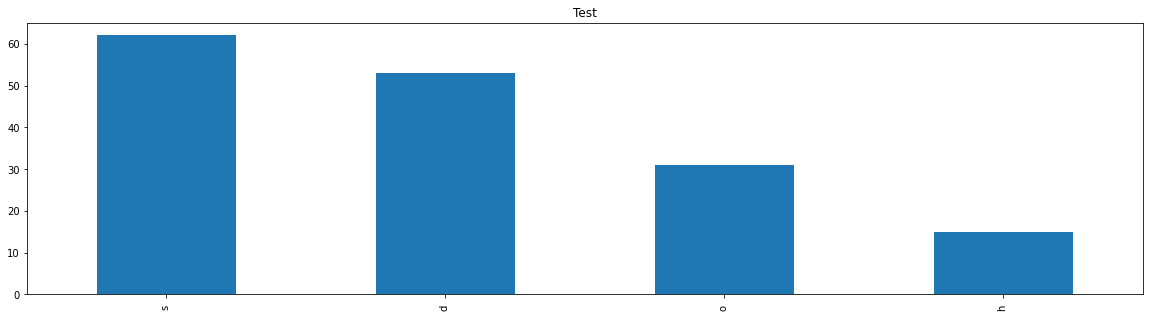

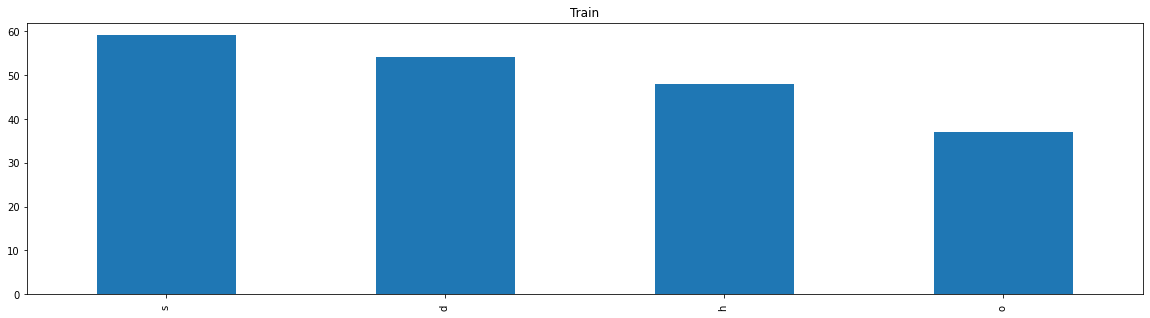

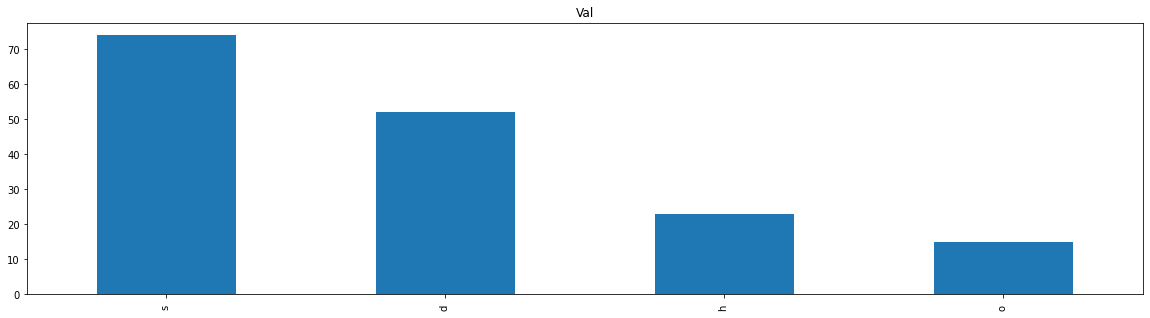

In [ ]:
# make class a categorical for each set
test['class'] = pd.Categorical(test['class'])
train['class'] = pd.Categorical(train['class'])
val['class'] = pd.Categorical(val['class'])

# s = ‘Sugi’ forest
# h = ‘Hinoki’ forest
# d = ‘Mixed deciduous’ forest
# o = ‘Other’ non-forest land
print("Where:\ns = ‘Sugi’ forest\nh = ‘Hinoki’ forest\nd = ‘Mixed deciduous’ forest\no = ‘Other’ non-forest land")

# and draw a picture
counts = test['class'].value_counts()
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(1, 1, 1)
counts.plot(kind='bar')
ax.set_title("Test")

counts = train['class'].value_counts()
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(1, 1, 1)
counts.plot(kind='bar')
ax.set_title("Train")

counts = val['class'].value_counts()
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(1, 1, 1)
counts.plot(kind='bar')
ax.set_title("Val")

Text(0.5, 1.0, 'Val Data')

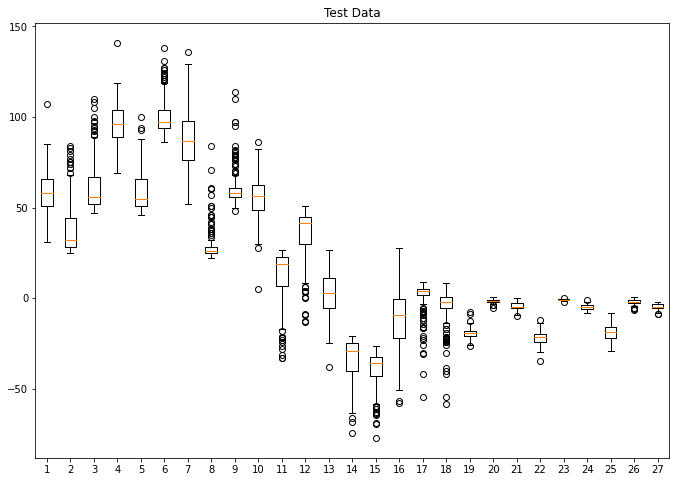

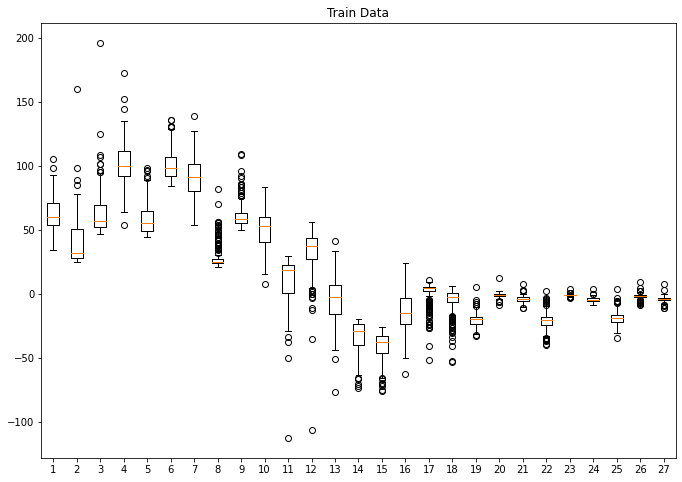

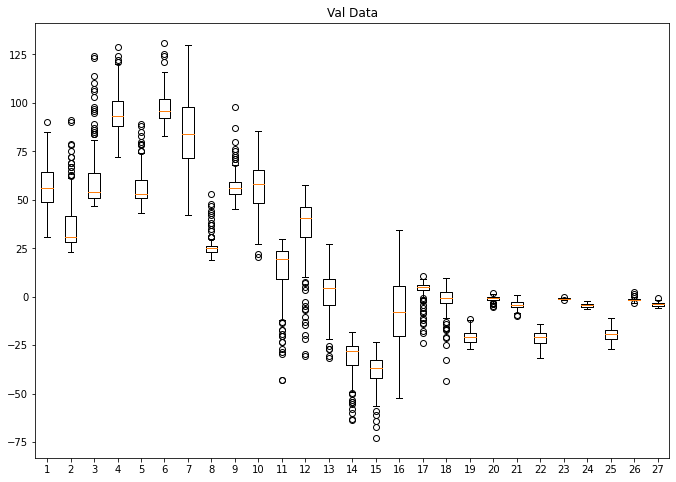

In [ ]:
## Set tree categories in each set
# test.iloc[:, 0] = test.iloc[:, 0].astype("category")
# train.iloc[:, 0] = train.iloc[:, 0].astype("category")
# val.iloc[:, 0] = val.iloc[:, 0].astype("category")

## Get variables for each set
X_test = test.iloc[:, 1:].to_numpy()
Y_test = test.iloc[:, 0]

X_train = train.iloc[:, 1:].to_numpy()
Y_train = train.iloc[:, 0]

X_val = val.iloc[:, 1:].to_numpy()
Y_val = val.iloc[:, 0]

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_test)
ax.set_title('Test Data')

fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_train)
ax.set_title('Train Data')

fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_val)
ax.set_title('Val Data')

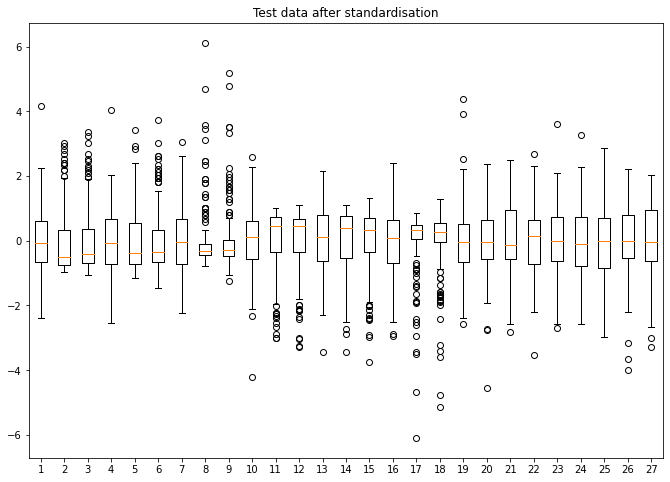

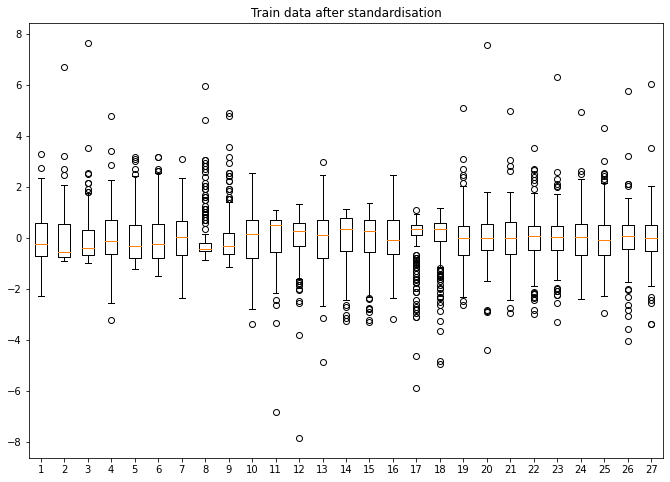

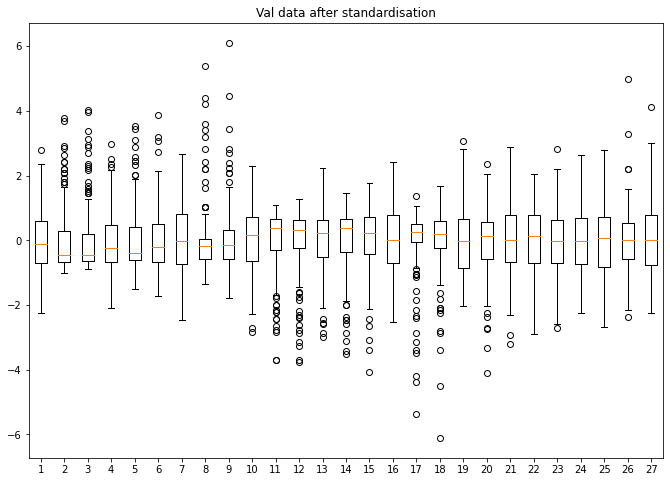

In [ ]:
## Standardise the test data
mu = np.mean(X_test, 0)
sigma = np.std(X_test, 0)
X_test = (X_test - mu) / sigma

# box plot after standardisation
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_test)
ax.set_title('Test data after standardisation');


## Standardise the train data
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu) / sigma

# box plot after standardisation
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_train)
ax.set_title('Train data after standardisation');


## Standardise the val data
mu = np.mean(X_val, 0)
sigma = np.std(X_val, 0)
X_val = (X_val - mu) / sigma

# box plot after standardisation
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X_val)
ax.set_title('Val data after standardisation');

## Evaluation Function

In [ ]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize="true", xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)

    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));

    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize="true", xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));





---



## Support Vector Machines (SVMs)

In [ ]:
## Grid Search
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

# Important:
# - rank test score gives us the order of which system is best
# - mean_test_score and std_test_score tell us the performance of the system across multiple folds
# - params which give us the model 0.8594697

{'mean_fit_time': array([0.00259194, 0.0024828 , 0.00428138, 0.01008492, 0.02343988,
        0.00279408, 0.00255837, 0.00262728, 0.00246625, 0.0034595 ,
        0.00219111, 0.00240893, 0.00251455, 0.00341659, 0.00204678,
        0.00207343, 0.00239062, 0.00326247, 0.00210996, 0.00192242,
        0.00202746, 0.0032414 , 0.00215216, 0.00264678, 0.00196285,
        0.00202665, 0.00227728, 0.00212889, 0.0023181 , 0.00208101,
        0.00245128, 0.00250654, 0.00231099, 0.00206823, 0.00291381,
        0.00210247, 0.00268817, 0.0021728 , 0.00249696, 0.00213032,
        0.00280085, 0.00221729, 0.00250626, 0.00208173, 0.00414715]),
 'mean_score_time': array([0.00068011, 0.00069404, 0.0007309 , 0.00091062, 0.00086126,
        0.00093279, 0.00097842, 0.00100179, 0.00096145, 0.00097613,
        0.00091958, 0.00091958, 0.00092154, 0.00097084, 0.0008111 ,
        0.00084314, 0.00090756, 0.00088458, 0.00074272, 0.00071907,
        0.00083127, 0.00090322, 0.00075278, 0.00076761, 0.00071545,
        0.

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


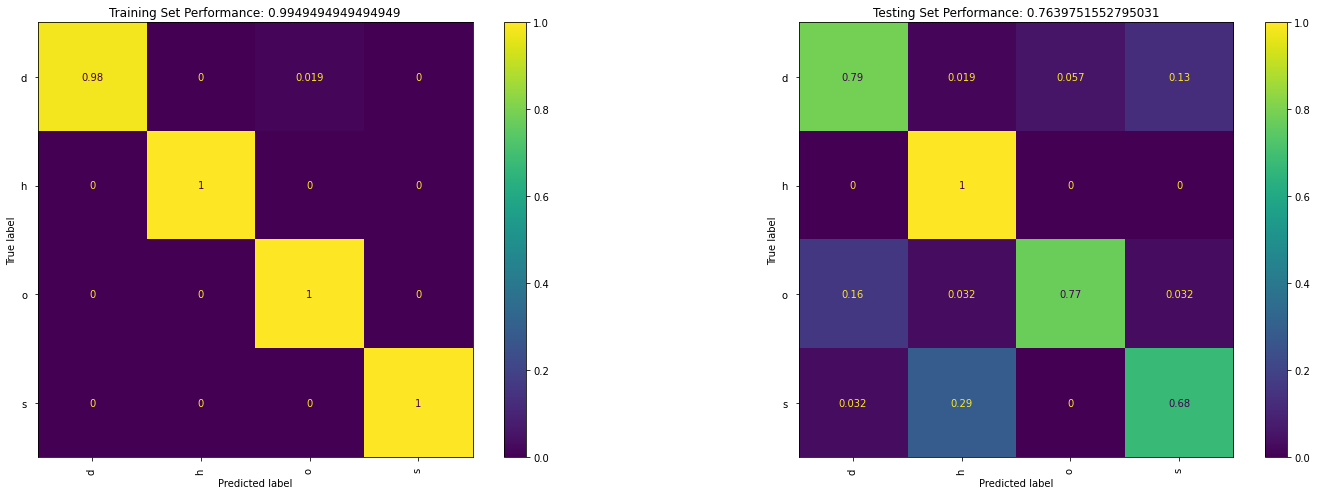

In [ ]:
## Best system from data
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)



---



## K Nearest Neighbours

In [ ]:
## Grid Search
param_grid = {'n_neighbors' : list(range(1,131)), 'weights' : ['uniform', 'distance']}
cknn = KNeighborsClassifier()
grid_search = GridSearchCV(cknn, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

{'mean_fit_time': array([0.00161018, 0.00082264, 0.0008532 , 0.0013741 , 0.00107298,
        0.00108104, 0.00096321, 0.00091825, 0.00092912, 0.00084624,
        0.00090494, 0.00081439, 0.00083532, 0.0008286 , 0.00082483,
        0.00084109, 0.00118551, 0.00103765, 0.00083041, 0.00092812,
        0.00086789, 0.00089192, 0.00086875, 0.00083466, 0.00082164,
        0.00082159, 0.00082445, 0.00086794, 0.00093503, 0.00088754,
        0.00092187, 0.0009017 , 0.00102425, 0.00084639, 0.00085368,
        0.00081697, 0.00084553, 0.0009953 , 0.0008419 , 0.00081801,
        0.00080986, 0.00093656, 0.00081968, 0.00082417, 0.00081921,
        0.00081959, 0.00084581, 0.00080786, 0.00081244, 0.00081921,
        0.00084615, 0.00079718, 0.00081444, 0.00081911, 0.00085988,
        0.00087328, 0.00095339, 0.00082464, 0.00081906, 0.00081134,
        0.00082059, 0.00088034, 0.00080786, 0.00083389, 0.00083036,
        0.00084305, 0.00130391, 0.00082884, 0.00099568, 0.00086155,
        0.00084014, 0.00081482,

{'n_neighbors': 10, 'weights': 'distance'}
260
19


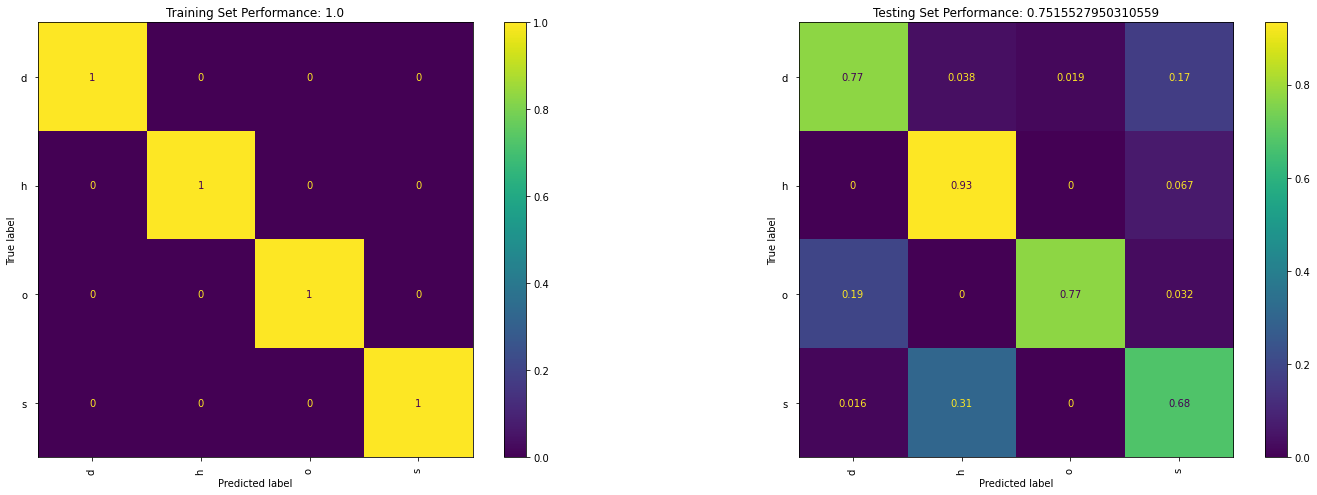

In [ ]:
## Select the best system from results
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
print(len(grid_search.cv_results_['params']))
print(best_system)
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)



---



---



## Random Forest Classifier

In [ ]:
## Grid Search
param_grid = {'max_depth': [2, 4, None], 'min_samples_split': [5, 10], 'n_estimators' : [25, 50, 100]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


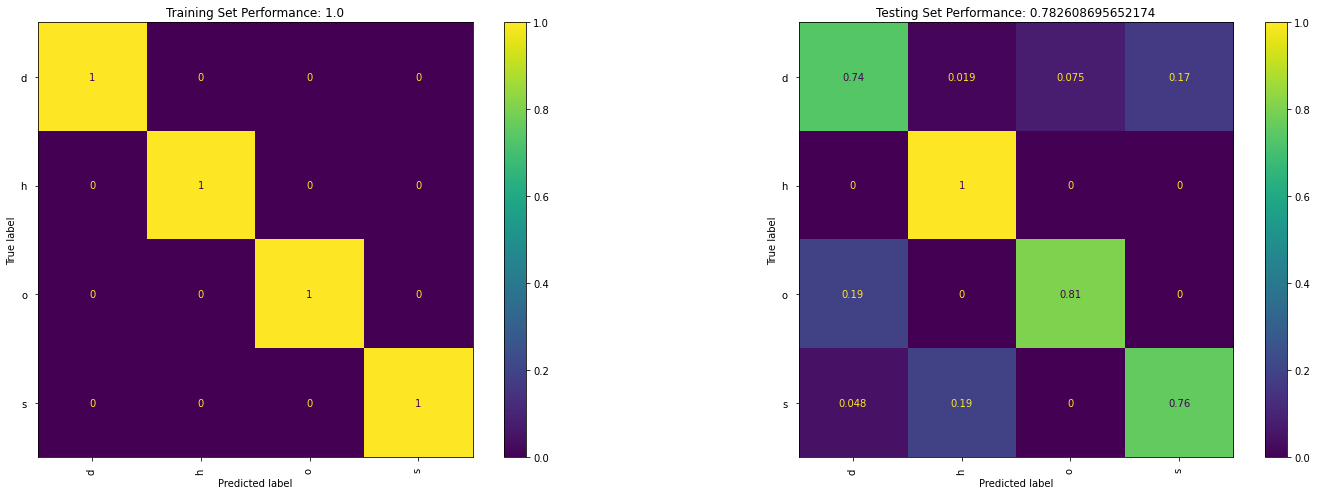

In [ ]:
## Best system from data
# rf = RandomForestClassifier().set_params(**grid_search.cv_results_['params'][-1])
# rf.fit(X_train, Y_train)
# eval_model(rf, X_train, Y_train, X_test, Y_test)

## Select the best system from results
best_system = np.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
rf = RandomForestClassifier().set_params(**params)
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

#{'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}



---

## Export as PDF

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('n10477659 Final Assignment_1A.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/n10477659 Final Assignment_1A.ipynb to pdf
[NbConvertApp] Support files will be in n10477659 Final Assignment_1A_files/
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConvertApp] Making directory ./n10477659 Final Assignment_1A_files
[NbConver

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'